In [5]:
import pandas as pd

In [6]:
df_orders = pd.read_csv('sample_submission.csv')

In [7]:
%%time
products_tables = [
  'tab_2_products_2020-01-01.csv',
  'tab_2_products_2020-01-11.csv',
  'tab_2_products_2020-01-21.csv',
  'tab_2_products_2020-01-31.csv',
  'tab_2_products_2020-02-10.csv',
  'tab_2_products_2020-03-01.csv',
  'tab_2_products_2020-03-11.csv',
  'tab_2_products_2020-03-21.csv',
  'tab_2_products_2020-03-31.csv',
  'tab_2_products_2020-04-10.csv',
  'tab_2_products_2020-04-20.csv',
  'tab_2_products_2020-04-30.csv',
  'tab_2_products_2020-05-20.csv',
  'tab_2_products_2020-05-30.csv',
  'tab_2_products_2020-06-09.csv',
  'tab_2_products_2020-06-19.csv',
  'tab_2_products_2020-06-29.csv',
  'tab_2_products_2020-07-19.csv',
  'tab_2_products_2020-07-29.csv',
  'tab_2_products_2020-08-08.csv',
  'tab_2_products_2020-08-18.csv',
  'tab_2_products_2020-08-28.csv',
  'tab_2_products_2020-09-07.csv',
]

df_products = []
for i,product_table in enumerate(products_tables):
  df_products.append(pd.read_csv(product_table))

CPU times: user 1min 30s, sys: 19.9 s, total: 1min 50s
Wall time: 1min 50s


In [8]:
df_full_products = pd.concat([*df_products])

In [9]:
df_orders = pd.read_csv('tab_1_orders.csv', parse_dates=['order_created_time'])

df_categories = pd.read_csv('tab_3_categories.csv')

df_user_profiles = pd.read_csv('tab_4_user_profiles.csv')

df_product_properties = pd.read_csv('tab_5_product_properties.csv')

df_city = pd.read_csv('tab_6_city.csv')

df_sample_submission = pd.read_csv('sample_submission.csv')

In [10]:
df_orders.head()

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web


In [11]:
df_categories.head()

,id,name,parent_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2


In [12]:
df_user_profiles.head()

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN


In [13]:
df_product_properties.head()

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г
3,2,Вкус,Черника
4,2,Сырье,Натуральное молоко


In [14]:
df_city.head 

<bound method NDFrame.head of      store_id city_name
0          14    Москва
1          21    Москва
2           1    Москва
3           4    Москва
4           7    Москва
..        ...       ...
783       816    Москва
784       814    Москва
785       812    Москва
786       841    Самара
787       815    Москва

[788 rows x 2 columns]>

In [15]:
df_sample_submission.head()

,Id,Predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...
3,1132,8613934 3599065 575614 4821474 11609320 699047...
4,1578,289404 4328240 3129788 9390886 11166655 173077...


In [16]:
df_orders.columns

Index(['user_id', 'order_id', 'order_created_time', 'retailer', 'store_id',
       'platform'],
      dtype='object')

In [17]:
df_orders[['order_created_time', 'retailer', 'store_id', 'platform']]

,order_created_time,retailer,store_id,platform
0,2020-09-26 10:48:57,METRO,21,app
1,2020-05-08 09:46:18,METRO,87,web
2,2020-05-14 15:06:03,METRO,320,app
3,2020-09-01 17:34:00,ВкусВилл,533,app
4,2020-05-20 06:32:50,Ашан,183,web
...,...,...,...,...
2461953,2020-09-01 15:41:27,Лента,218,app
2461954,2020-09-17 10:16:16,Лента,130,app
2461955,2020-04-29 10:09:37,Лента,373,app
2461956,2020-09-30 09:18:19,Лента,781,undefined


In [18]:
df_orders['period'] = (df_orders['order_created_time'].dt.hour % 24 + 4) // 4
df_orders['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [19]:
df_orders.period.value_counts()

Morning          705314
Noon             569210
Early Morning    482437
Evening          428459
Night            175156
Late Night       101382
Name: period, dtype: int64

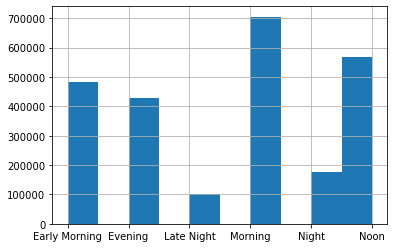

In [21]:
import matplotlib.pyplot as plt

df_orders.period.sort_values().hist()

In [35]:
df_orders.period.sort_values()

1342957    Early Morning
1688294    Early Morning
2111059    Early Morning
2111063    Early Morning
424024     Early Morning
               ...      
2045561             Noon
505736              Noon
2045563             Noon
505756              Noon
1582832             Noon
Name: period, Length: 2461958, dtype: object

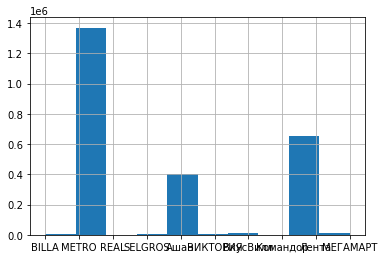

In [43]:
#самый популярный бренд  и самый дорогой бренд

fig, ax = plt.subplots()
df_orders[df_orders.retailer.isin(['METRO', 'Лента', 'Ашан', 'МЕГАМАРТ', 'ВкусВилл', 'BILLA', 'SELGROS', 'ВИКТОРИЯ', 'Командор', 'REAL'])].retailer.sort_values().hist(bins=10)

(array([7., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([   1464. ,  138290.2,  275116.4,  411942.6,  548768.8,  685595. ,
         822421.2,  959247.4, 1096073.6, 1232899.8, 1369726. ]),
 <a list of 10 Patch objects>)

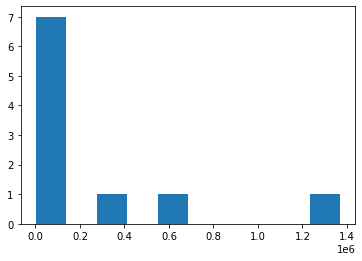

In [44]:
plt.hist(df_orders.retailer.value_counts()[:10])

In [45]:
['METRO', 'Лента', 'Ашан', 'МЕГАМАРТ', 'ВкусВилл', 'BILLA', 'SELGROS', 'ВИКТОРИЯ', 'Командор', 'REAL']
df_orders.retailer.value_counts()[:13]

METRO           1369726
Лента            653387
Ашан             401004
МЕГАМАРТ          11006
ВкусВилл           8821
BILLA              2735
SELGROS            2031
ВИКТОРИЯ           2017
Командор           1740
REAL               1464
Азбука Вкуса       1443
Аллея               925
Бахетле             899
Name: retailer, dtype: int64